In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report,
                             roc_curve, ConfusionMatrixDisplay,confusion_matrix)

from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline


In [27]:
df = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Checking the Dayatype of each columns

In [28]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


# 📌Checking if any missing Values are present of not

In [29]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Sometimes TotalCharges is stored as a string instead of a numeric type.

In [30]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [31]:
non_numeric = pd.to_numeric(df["TotalCharges"], errors='coerce').isna()
df[non_numeric]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [32]:
df[non_numeric].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

# Here we can say the index-es Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64') have the missing values in the TotalCharges column

# Handling the Missing Values

In [33]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Dropping the unnecessary column customerID

In [34]:
df.drop('customerID',axis= 1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Checking the Distinct Values of the columns

In [35]:
for col in df.columns:
    print("column : ",df[col].value_counts())

column :  gender
Male      3549
Female    3483
Name: count, dtype: int64
column :  SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64
column :  Partner
No     3639
Yes    3393
Name: count, dtype: int64
column :  Dependents
No     4933
Yes    2099
Name: count, dtype: int64
column :  tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64
column :  PhoneService
Yes    6352
No      680
Name: count, dtype: int64
column :  MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64
column :  InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64
column :  OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64
column :  OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
N

# 📌Since Churn is Target Catagorical variable I need to Encode that with 0 and 1



In [36]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(df['Churn'].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


# ✅I need to keep in mind that there present an imbalance in the two distinct catagory class. "0" present 5174 times and "1" present 1869 times

## So here I need to handle class imbalance problem

# 📌Lets find the numeric and non-numeric columns

In [37]:
numerical_cols = [feature for feature in df.columns if df[feature].dtypes != 'O' and feature != 'Churn' ]

print('Number of numerical variables: ',len(numerical_cols))
print('Numeric variables :',numerical_cols)

Number of numerical variables:  4
Numeric variables : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [38]:
categorical_cols = [feature for feature in df.columns if df[feature].dtypes == 'O' and feature != 'customerID']

print('Number of Non numerical variables: ',len(categorical_cols))
print('Non Numeric variables :',categorical_cols)

Number of Non numerical variables:  15
Non Numeric variables : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


# 📌Checking if there present outliers or not

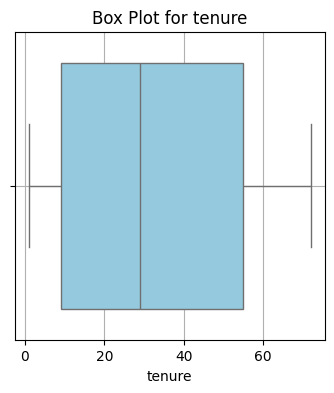

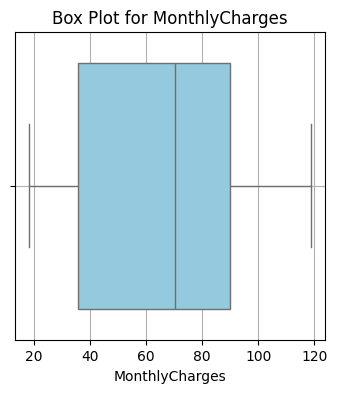

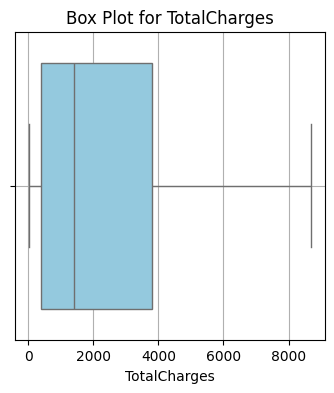

In [39]:
for column in numerical_cols:
  if column == "SeniorCitizen":
    continue
  plt.figure(figsize=(4, 4))
  sns.boxplot(x=df[column], color='skyblue')
  plt.title(f"Box Plot for {column}")
  plt.xlabel(column)
  plt.grid(True)
  plt.show()

# ✅ Through the Box Plot we can say there is no Outliers present in the numeric features

# 📌 Seperating Feature and Target Variable

In [40]:
X = df[numerical_cols + categorical_cols]
y = df['Churn']

In [41]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,29.85,29.85,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,0,34,56.95,1889.50,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,0,2,53.85,108.15,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,0,45,42.30,1840.75,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,0,2,70.70,151.65,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [42]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


# 📌 Now I need to preprocess and perform Feature Engineering with the Data
## ✅ preprocess numeric features through StandardScaler
## ✅ preprocess catagorical features through OneHotEncoder

In [43]:
# Preprocessing step
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

X_processed = preprocessor.fit_transform(X)

# 📌 I have found out that the data has class imbalance problem so to handle this I have used SMOTE

In [44]:

smote_enn = SMOTEENN(random_state=42)

# Full pipeline: preprocessing → resampling
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', smote_enn)
])

# Apply transformations
X_resampled, y_resampled = pipeline.fit_resample(X, y)

## Split resampled data into train & test sets

In [45]:

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5201, 30) (5201,)
Testing set shape: (1301, 30) (1301,)


In [46]:
X.shape

(7032, 19)

# 🎯 Creating a Random Forest model and fit the model on the training data




In [47]:
rf = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

# ✅ Generate predictions and probabilities

In [50]:

y_pred  = rf.predict(X_test)              # class labels
y_proba = rf.predict_proba(X_test)[:, 1]  # probability of positive class (Churn)
cm = confusion_matrix(y_test, y_pred)
# Print key metrics
print("Default Random Forest Performance")
print(f"F1-score : {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC  : {roc_auc_score(y_test, y_proba):.4f}\n")
print(classification_report(y_test, y_pred))
print("Confussion Matrix : ",cm)

Default Random Forest Performance
F1-score : 0.9649
AUC-ROC  : 0.9918

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       558
           1       0.97      0.96      0.96       743

    accuracy                           0.96      1301
   macro avg       0.96      0.96      0.96      1301
weighted avg       0.96      0.96      0.96      1301

Confussion Matrix :  [[534  24]
 [ 28 715]]


# 📌 Plot the Graph of ROC Curve ,Confussion Matrix , Learning Curve

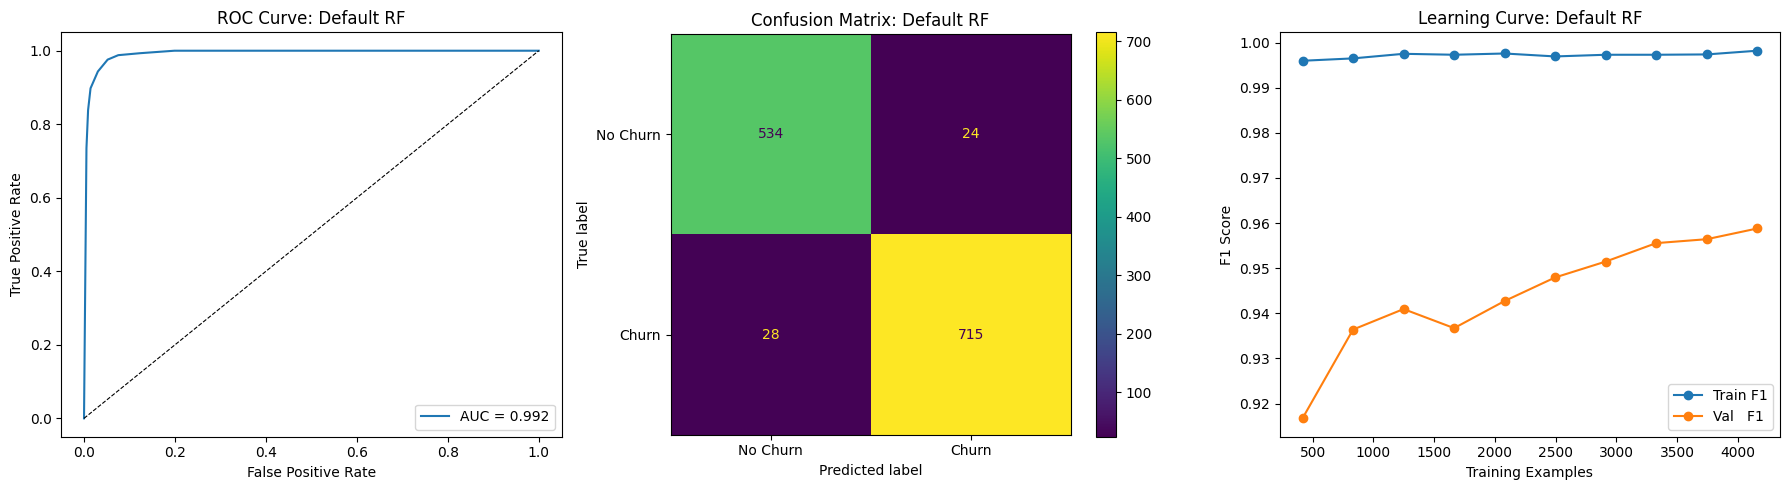

In [51]:
# Set up a 1×3 plot grid for ROC, confusion matrix, and learning curve
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- a) Learning Curve Data (F1) ---
train_sizes, train_scores, val_scores = learning_curve(
    rf,
    X_train,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 10 points from 10% to 100% of train data
    scoring='f1',
    n_jobs=-1,
    random_state=42
)
train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)

# --- b) ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba)
axes[0].plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.3f}")
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=0.8)  # random-guess line
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve: Default RF")
axes[0].legend()

# --- c) Confusion Matrix ---
ConfusionMatrixDisplay.from_estimator(
    rf,
    X_test,
    y_test,
    display_labels=['No Churn','Churn'],
    ax=axes[1]
)
axes[1].set_title("Confusion Matrix: Default RF")

# --- d) Learning Curve (F1) ---
axes[2].plot(train_sizes, train_mean, marker='o', label='Train F1')
axes[2].plot(train_sizes, val_mean,   marker='o', label='Val   F1')
axes[2].set_xlabel("Training Examples")
axes[2].set_ylabel("F1 Score")
axes[2].set_title("Learning Curve: Default RF")
axes[2].legend()

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

# 📌Hyperparameter Tuning with RandomizedSearchCV


In [52]:
# Define parameter distribution for Random Forest
param_dist = {
    'n_estimators': [100, 200, 500],        # number of trees
    'max_depth': [None, 10, 20, 30],        # tree depth
    'min_samples_split': [2, 5, 10],        # min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],          # min samples at a leaf node
    'max_features': ['sqrt'],               # number of features to consider at each split
    'bootstrap': [False]                    # use bootstrap samples or full dataset
}

# Setup RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=rf,                           # baseline RF model
    param_distributions=param_dist,
    n_iter=10,                              # number of parameter settings sampled
    scoring='f1',                           # optimize for F1-score
    cv=5,                                   # 5-fold cross-validation
    return_train_score=True,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# Fit the search on the training data
rs.fit(X_train, y_train)

# Extract the best estimator and its parameters
best_rf = rs.best_estimator_
print("Best hyperparameters:", rs.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


In [53]:
# Predictions & probabilities for tuned RF
y_pred_tuned  = best_rf.predict(X_test)
y_proba_tuned = best_rf.predict_proba(X_test)[:, 1]
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
# Print performance metrics
print("Tuned Random Forest Performance")
print(f"F1-score : {f1_score(y_test, y_pred_tuned):.4f}")
print(f"AUC-ROC  : {roc_auc_score(y_test, y_proba_tuned):.4f}\n")
print(classification_report(y_test, y_pred_tuned))
print("Confussion Matrix : ",cm_tuned)

Tuned Random Forest Performance
F1-score : 0.9739
AUC-ROC  : 0.9959

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       558
           1       0.97      0.98      0.97       743

    accuracy                           0.97      1301
   macro avg       0.97      0.97      0.97      1301
weighted avg       0.97      0.97      0.97      1301

Confussion Matrix :  [[534  24]
 [ 15 728]]


# Plot after Hyperparameter tunning

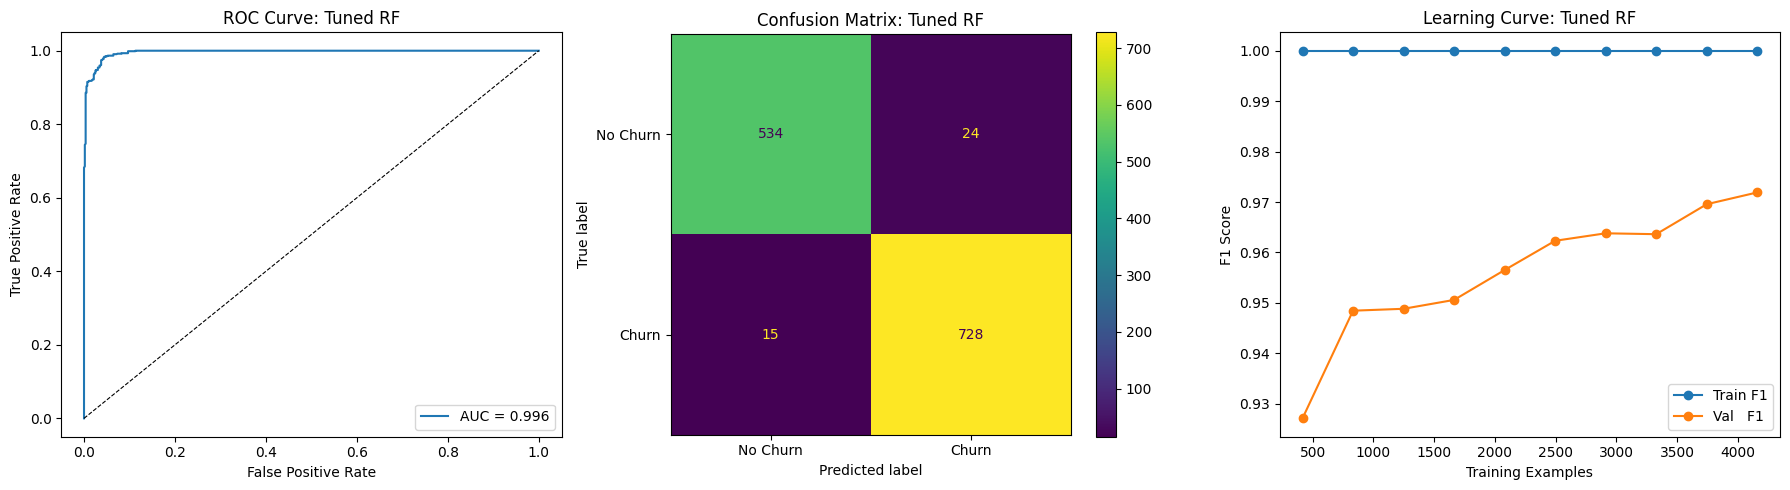

In [54]:
# Plot ROC, confusion matrix, and learning curve for tuned RF
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#  a) Learning curve data (F1)
train_sizes_t, train_scores_t, val_scores_t = learning_curve(
    best_rf,
    X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1',
    n_jobs=-1,
    random_state=42
)
train_mean_t = train_scores_t.mean(axis=1)
val_mean_t   = val_scores_t.mean(axis=1)

#  b) ROC Curve
fpr_t, tpr_t, _ = roc_curve(y_test, y_proba_tuned)
axes[0].plot(fpr_t, tpr_t, label=f"AUC = {roc_auc_score(y_test, y_proba_tuned):.3f}")
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=0.8)
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve: Tuned RF")
axes[0].legend()

#  c) Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    best_rf, X_test, y_test,
    display_labels=['No Churn', 'Churn'],
    ax=axes[1]
)
axes[1].set_title("Confusion Matrix: Tuned RF")

#  d) Learning Curve (F1)
axes[2].plot(train_sizes_t, train_mean_t, marker='o', label='Train F1')
axes[2].plot(train_sizes_t, val_mean_t,   marker='o', label='Val   F1')
axes[2].set_xlabel("Training Examples")
axes[2].set_ylabel("F1 Score")
axes[2].set_title("Learning Curve: Tuned RF")
axes[2].legend()

plt.tight_layout()
plt.show()

#  📌Feature Importance

In [55]:
# Get column names from each transformer
num_features = numerical_cols
cat_features = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_cols)

# Combine them
feature_names = list(num_features) + list(cat_features)


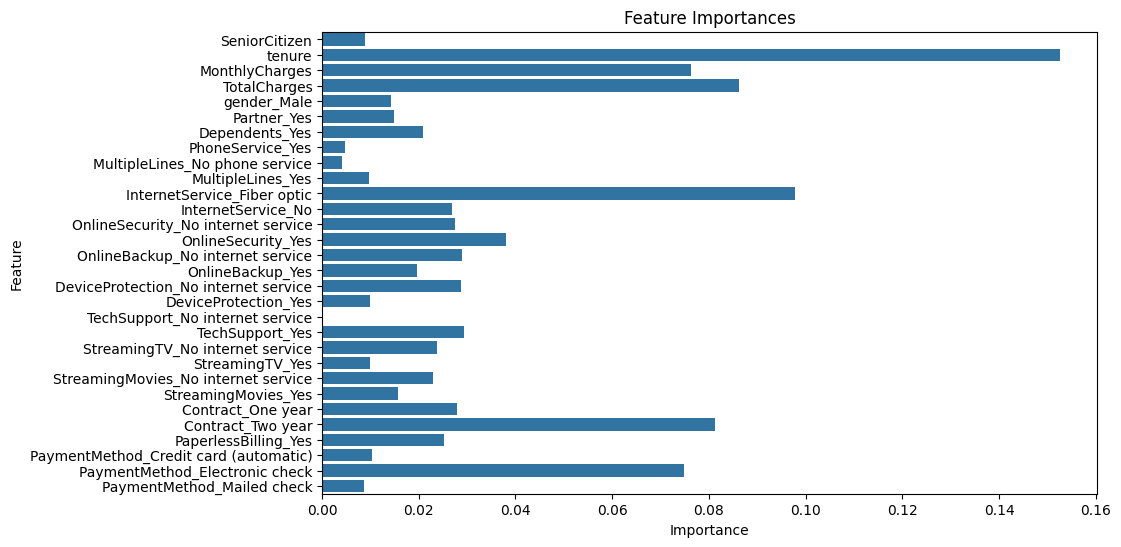

In [56]:
importances = rf.feature_importances_
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importances")
plt.show()

In [57]:
importance_df

,Feature,Importance
0,SeniorCitizen,0.008840
1,tenure,0.152637
2,MonthlyCharges,0.076350
3,TotalCharges,0.086283
4,gender_Male,0.014184
5,Partner_Yes,0.014792
6,Dependents_Yes,0.020949
7,PhoneService_Yes,0.004832
8,MultipleLines_No phone service,0.004200
9,MultipleLines_Yes,0.009767


# 📌 Through this we can say that these features has high importance in the Target Variable

# 🎯 Creating a Logistic Regression model and fit the model on the training data

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [59]:
model = LogisticRegression(max_iter=1000)  # increase max_iter if convergence warnings
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
# Print key metrics
print("Default Logistic Regression Performance")
print(f"F1-score : {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC  : {roc_auc_score(y_test, y_proba):.4f}\n")
print(classification_report(y_test, y_pred))
print("Confussion Matrix : ",cm)

Default Logistic Regression Performance
F1-score : 0.9131
AUC-ROC  : 0.9918

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       558
           1       0.91      0.91      0.91       743

    accuracy                           0.90      1301
   macro avg       0.90      0.90      0.90      1301
weighted avg       0.90      0.90      0.90      1301

Confussion Matrix :  [[494  64]
 [ 65 678]]


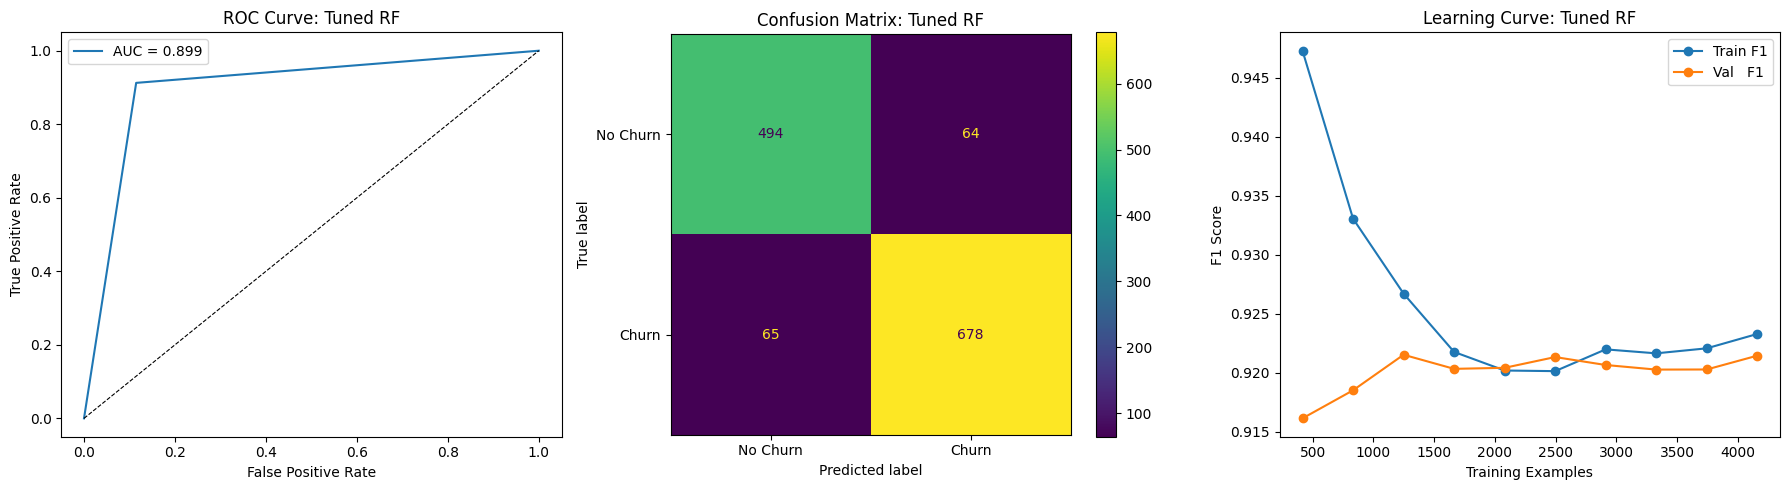

In [60]:
# Plot ROC, confusion matrix, and learning curve for tuned RF
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#  a) Learning curve data (F1)
train_sizes_t, train_scores_t, val_scores_t = learning_curve(
    model,
    X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1',
    n_jobs=-1,
    random_state=42
)
train_mean_t = train_scores_t.mean(axis=1)
val_mean_t   = val_scores_t.mean(axis=1)

#  b) ROC Curve
fpr_t, tpr_t, _ = roc_curve(y_test, y_pred)
axes[0].plot(fpr_t, tpr_t, label=f"AUC = {roc_auc_score(y_test, y_pred):.3f}")
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=0.8)
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve: Tuned RF")
axes[0].legend()

#  c) Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test,
    display_labels=['No Churn', 'Churn'],
    ax=axes[1]
)
axes[1].set_title("Confusion Matrix: Tuned RF")

#  d) Learning Curve (F1)
axes[2].plot(train_sizes_t, train_mean_t, marker='o', label='Train F1')
axes[2].plot(train_sizes_t, val_mean_t,   marker='o', label='Val   F1')
axes[2].set_xlabel("Training Examples")
axes[2].set_ylabel("F1 Score")
axes[2].set_title("Learning Curve: Tuned RF")
axes[2].legend()

plt.tight_layout()
plt.show()

# 📌Hyperparameter Tuning with of the Logistic Regression Model

In [61]:
# 2. Set up hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength (inverse); smaller = stronger regularization
    'penalty': ['l1', 'l2'],              # Norm used in penalization
    'solver': ['liblinear'],              # 'liblinear' supports both l1 and l2 penalties
}

# 3. Initialize Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# 4. Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 5. Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# 6. Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_lr_best = best_model.predict(X_test)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.910401241409887


In [62]:
cm_lr_tuned = confusion_matrix(y_test, y_pred_lr_best)
# Print key metrics
print("Tuned Logistic Regression Performance")
print(f"F1-score : {f1_score(y_test, y_pred_lr_best):.4f}")
print(f"AUC-ROC  : {roc_auc_score(y_test, y_pred_lr_best):.4f}\n")
print(classification_report(y_test, y_pred_lr_best))
print("Confussion Matrix : ",cm_lr_tuned)

Tuned Logistic Regression Performance
F1-score : 0.9124
AUC-ROC  : 0.8982

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       558
           1       0.91      0.91      0.91       743

    accuracy                           0.90      1301
   macro avg       0.90      0.90      0.90      1301
weighted avg       0.90      0.90      0.90      1301

Confussion Matrix :  [[494  64]
 [ 66 677]]


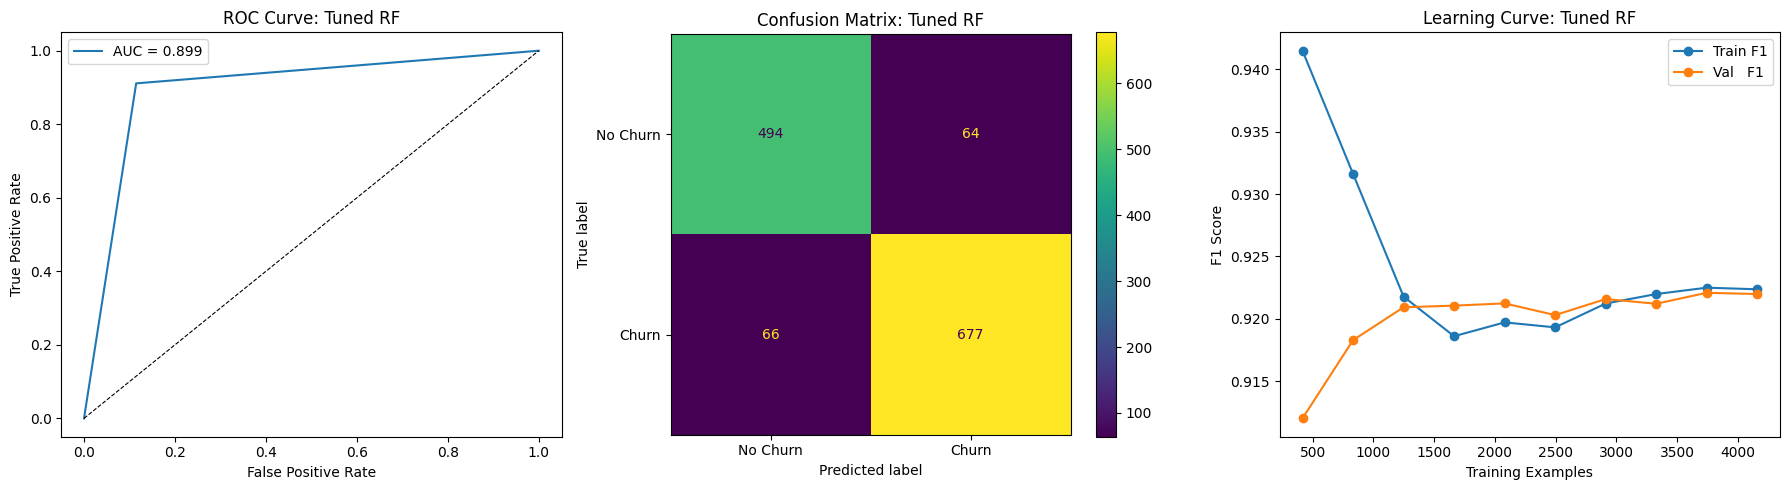

In [63]:
# Plot ROC, confusion matrix, and learning curve for tuned RF
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#  a) Learning curve data (F1)
train_sizes_t, train_scores_t, val_scores_t = learning_curve(
    best_model,
    X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1',
    n_jobs=-1,
    random_state=42
)
train_mean_t = train_scores_t.mean(axis=1)
val_mean_t   = val_scores_t.mean(axis=1)

#  b) ROC Curve
fpr_t, tpr_t, _ = roc_curve(y_test, y_pred_lr_best)
axes[0].plot(fpr_t, tpr_t, label=f"AUC = {roc_auc_score(y_test, y_pred):.3f}")
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=0.8)
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve: Tuned RF")
axes[0].legend()

#  c) Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    best_model, X_test, y_test,
    display_labels=['No Churn', 'Churn'],
    ax=axes[1]
)
axes[1].set_title("Confusion Matrix: Tuned RF")

#  d) Learning Curve (F1)
axes[2].plot(train_sizes_t, train_mean_t, marker='o', label='Train F1')
axes[2].plot(train_sizes_t, val_mean_t,   marker='o', label='Val   F1')
axes[2].set_xlabel("Training Examples")
axes[2].set_ylabel("F1 Score")
axes[2].set_title("Learning Curve: Tuned RF")
axes[2].legend()

plt.tight_layout()
plt.show()

# 🎯 Creating a Deep Learning based model using Tensorflow and fit the model on the training data


In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7402 - loss: 0.5028 - val_accuracy: 0.9175 - val_loss: 0.2025
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9024 - loss: 0.2384 - val_accuracy: 0.9136 - val_loss: 0.1931
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9049 - loss: 0.2326 - val_accuracy: 0.9232 - val_loss: 0.1882
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9060 - loss: 0.2217 - val_accuracy: 0.9232 - val_loss: 0.1842
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9114 - loss: 0.2109 - val_accuracy: 0.9309 - val_loss: 0.1711
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9149 - loss: 0.1994 - val_accuracy: 0.9309 - val_loss: 0.1679
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9190 - loss: 0.2006 - val_accuracy: 0.9290 - val_loss: 0.1657
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9185 - loss: 0.1973 - val_accuracy: 0.9309 - val_

In [65]:
# Get predicted probabilities
y_pred_proba_dl = model.predict(X_test)

# Convert to binary predictions
y_pred_dl = (y_pred_proba_dl > 0.5).astype(int)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [66]:
cm_dl = confusion_matrix(y_test, y_pred_dl)
print("Tuned Logistic Regression Performance")
print(f"F1-score : {f1_score(y_test, y_pred_dl):.4f}")
print(f"AUC-ROC  : {roc_auc_score(y_test, y_pred_dl):.4f}\n")
print(classification_report(y_test, y_pred_dl))
print("Confussion Matrix : ",cm_dl)

Tuned Logistic Regression Performance
F1-score : 0.9325
AUC-ROC  : 0.9245

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       558
           1       0.94      0.92      0.93       743

    accuracy                           0.92      1301
   macro avg       0.92      0.92      0.92      1301
weighted avg       0.92      0.92      0.92      1301

Confussion Matrix :  [[518  40]
 [ 59 684]]


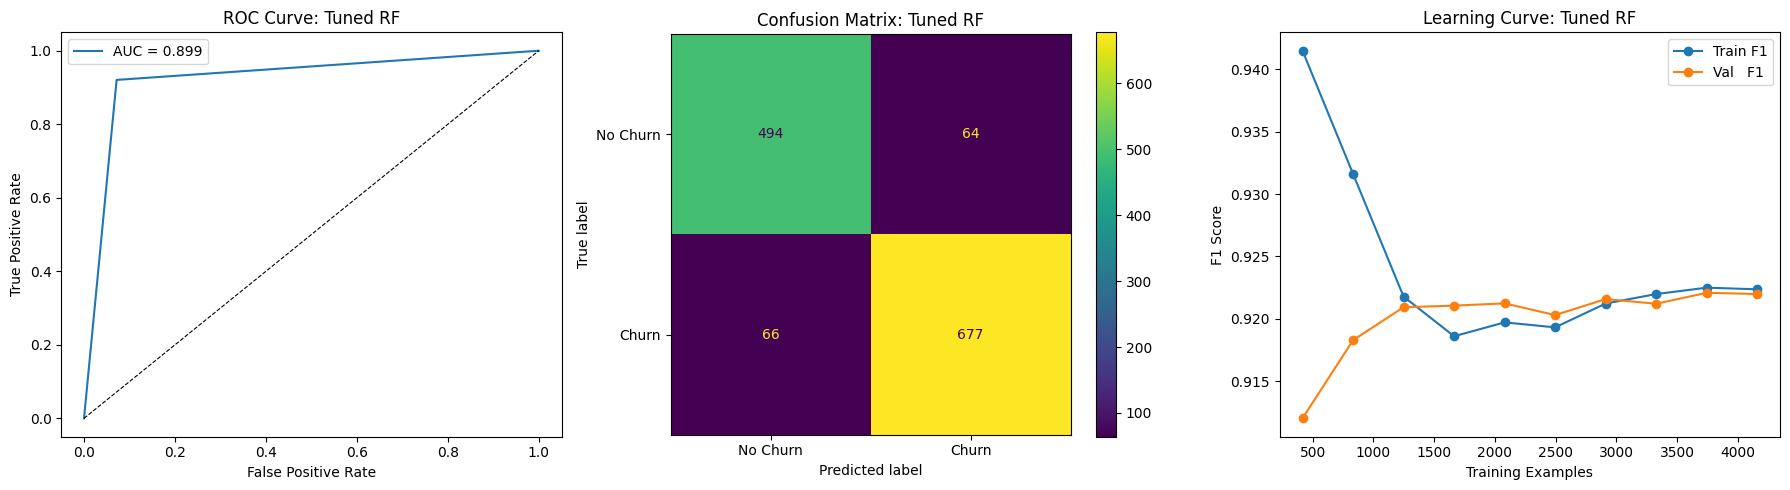

In [67]:
# Plot ROC, confusion matrix, and learning curve for tuned RF
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#  a) Learning curve data (F1)
train_sizes_t, train_scores_t, val_scores_t = learning_curve(
    best_model,
    X_train, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1',
    n_jobs=-1,
    random_state=42
)
train_mean_t = train_scores_t.mean(axis=1)
val_mean_t   = val_scores_t.mean(axis=1)

#  b) ROC Curve
fpr_t, tpr_t, _ = roc_curve(y_test, y_pred_dl)
axes[0].plot(fpr_t, tpr_t, label=f"AUC = {roc_auc_score(y_test, y_pred):.3f}")
axes[0].plot([0, 1], [0, 1], 'k--', linewidth=0.8)
axes[0].set_xlabel("False Positive Rate")
axes[0].set_ylabel("True Positive Rate")
axes[0].set_title("ROC Curve: Tuned RF")
axes[0].legend()

#  c) Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    best_model, X_test, y_test,
    display_labels=['No Churn', 'Churn'],
    ax=axes[1]
)
axes[1].set_title("Confusion Matrix: Tuned RF")

#  d) Learning Curve (F1)
axes[2].plot(train_sizes_t, train_mean_t, marker='o', label='Train F1')
axes[2].plot(train_sizes_t, val_mean_t,   marker='o', label='Val   F1')
axes[2].set_xlabel("Training Examples")
axes[2].set_ylabel("F1 Score")
axes[2].set_title("Learning Curve: Tuned RF")
axes[2].legend()

plt.tight_layout()
plt.show()